Acceptance rate of graph 1: 0.7579701195219124
Sample mean of graph 1: [ 0.01043034 -0.01305972]
Sample covariance of graph 1:
 [[0.99860222 0.00787115]
 [0.00787115 0.98607737]]


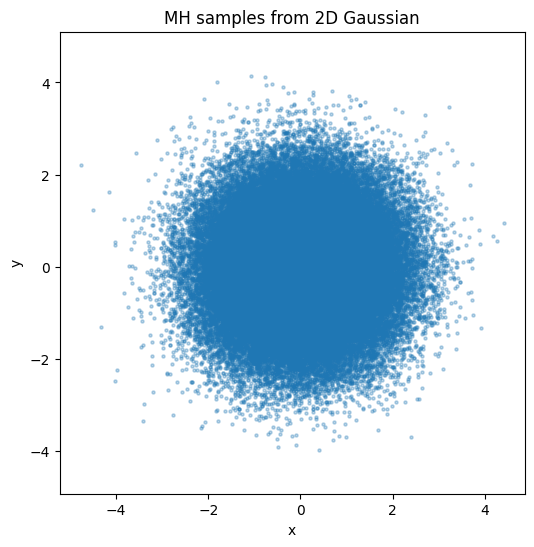

Acceptance rate of graph 2: 0.7059581673306773
Sample mean of graph 2: [-0.00143485 -0.01195481]
Sample covariance of graph 2:
 [[0.81911955 0.51937503]
 [0.51937503 1.0196123 ]]


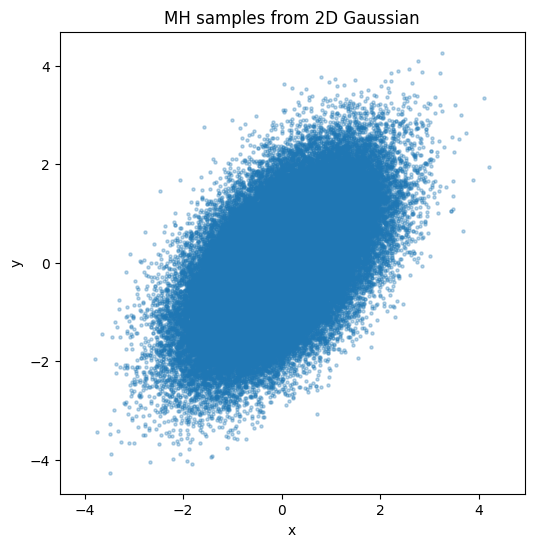

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def ln_p(x, mu, sigma_inv):
    d = x - mu
    return -0.5 * (d @ sigma_inv @ d)
def MH_2D(n_samples, burn_in, step_scale, mu, sigma, seed):
    rng = np.random.default_rng(seed)
    sigma_inv = np.linalg.inv(sigma)
    x = mu.astype(float).copy()   
    samples = []
    accepted = 0
    total_steps = n_samples + burn_in
    for i in range(total_steps):
        x1 = x + rng.normal(loc=0.0, scale=step_scale, size=2) 
        lnp_x  = ln_p(x,  mu, sigma_inv) 
        lnp_x1 = ln_p(x1, mu, sigma_inv)
        ln_alpha = lnp_x1 - lnp_x
        if np.log(rng.random()) < ln_alpha:
            x = x1
            accepted += 1
        if i >= burn_in:
            samples.append(x.copy())
    samples = np.array(samples)
    acc_rate = accepted / total_steps
    return samples, acc_rate
samples1, acc1 = MH_2D(
    n_samples=500000,
    burn_in=2000,
    mu=np.zeros(2),
    sigma=np.eye(2),
    step_scale=0.5,
    seed=7
)
print("Acceptance rate of graph 1:", acc1)
print("Sample mean of graph 1:", samples1.mean(axis=0))
print("Sample covariance of graph 1:\n", np.cov(samples1.T))

plt.figure(figsize=(6, 6))
plt.scatter(samples1[::5, 0], samples1[::5, 1], s=5, alpha=0.3)
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("MH samples from 2D Gaussian")
plt.show()
samples2, acc2 = MH_2D(
    n_samples=500000,
    burn_in=2000,
    mu=np.zeros(2),
    sigma=np.array([[0.8,0.4],
                    [0.6,1.0]]),
    step_scale=0.5,
    seed=7
)
print("Acceptance rate of graph 2:", acc2)
print("Sample mean of graph 2:", samples2.mean(axis=0))
print("Sample covariance of graph 2:\n", np.cov(samples2.T))

plt.figure(figsize=(6, 6))
plt.scatter(samples2[::5, 0], samples2[::5, 1], s=5, alpha=0.3)
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("MH samples from 2D Gaussian")
plt.show()